In [55]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

In [96]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
y_test = pd.read_csv('titanic/gender_submission.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


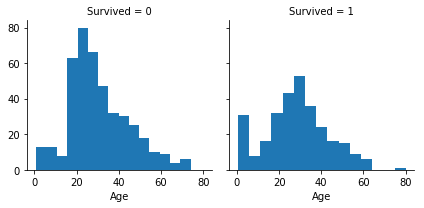

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=15)

In [11]:
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [221]:
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [97]:
train_df['ClassFare'] = 0
train_df.loc[(train_df['Fare'] == 0.0), 'ClassFare'] = 1
train_df.loc[(train_df['Fare'] >= 7.000) & (train_df['Fare'] <= 20.000), 'ClassFare'] = 2
train_df.loc[(train_df['Fare'] >= 20.000) & (train_df['Fare'] <= 40.000), 'ClassFare'] = 3
train_df.loc[(train_df['Fare'] >= 40.000), 'ClassFare'] = 4

test_df['ClassFare'] = 0
test_df.loc[(test_df['Fare'] == 0.0), 'ClassFare'] = 1
test_df.loc[(test_df['Fare'] >= 7.000) & (test_df['Fare'] <= 20.000), 'ClassFare'] = 2
test_df.loc[(test_df['Fare'] >= 20.000) & (test_df['Fare'] <= 40.000), 'ClassFare'] = 3
test_df.loc[(test_df['Fare'] >= 40.000), 'ClassFare'] = 4

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ClassFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [99]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [100]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [131]:
combine[0][['Title', 'Survived']].groupby('Title', as_index=False).agg(['mean', 'count'])

Survived      
              mean count
Title                   
Capt      0.000000     1
Col       0.500000     2
Countess  1.000000     1
Don       0.000000     1
Dr        0.428571     7
Jonkheer  0.000000     1
Lady      1.000000     1
Major     0.500000     2
Master    0.575000    40
Miss      0.697802   182
Mlle      1.000000     2
Mme       1.000000     1
Mr        0.156673   517
Mrs       0.792000   125
Ms        1.000000     1
Rev       0.000000     6
Sir       1.000000     1

In [60]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [61]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,ClassFare,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2,1


In [62]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [63]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ClassFare,Title
0,0,3,0,22.0,1,0,7.2500,S,2,1
1,1,1,1,38.0,1,0,71.2833,C,4,3
2,1,3,1,26.0,0,0,7.9250,S,2,2
3,1,1,1,35.0,1,0,53.1000,S,4,3
4,0,3,0,35.0,0,0,8.0500,S,2,1


In [64]:
for dataset in combine:
    
    guess_age_h_5 = dataset[(dataset['Sex'] == 0) & (dataset['Title'] == 5)]['Age'].dropna().median()
    guess_age_h_4 = dataset[(dataset['Sex'] == 0) & (dataset['Title'] == 4)]['Age'].dropna().median()
    guess_age_h_3 = dataset[(dataset['Sex'] == 0) & (dataset['Title'] == 3)]['Age'].dropna().median()
    guess_age_h_2 = dataset[(dataset['Sex'] == 0) & (dataset['Title'] == 2)]['Age'].dropna().median()
    guess_age_h_1 = dataset[(dataset['Sex'] == 0) & (dataset['Title'] == 1)]['Age'].dropna().median()

    guess_age_m_5 = dataset[(dataset['Sex'] == 1) & (dataset['Title'] == 5)]['Age'].dropna().median()
    guess_age_m_4 = dataset[(dataset['Sex'] == 1) & (dataset['Title'] == 4)]['Age'].dropna().median()
    guess_age_m_3 = dataset[(dataset['Sex'] == 1) & (dataset['Title'] == 3)]['Age'].dropna().median()
    guess_age_m_2 = dataset[(dataset['Sex'] == 1) & (dataset['Title'] == 2)]['Age'].dropna().median()
    guess_age_m_1 = dataset[(dataset['Sex'] == 1) & (dataset['Title'] == 1)]['Age'].dropna().median()


    dataset.loc[(dataset['Sex'] == 0) & (dataset['Title'] == 5) & dataset['Age'].isnull(), 'Age'] = guess_age_h_5
    dataset.loc[(dataset['Sex'] == 0) & (dataset['Title'] == 4) & dataset['Age'].isnull(), 'Age'] = guess_age_h_4
    dataset.loc[(dataset['Sex'] == 0) & (dataset['Title'] == 3) & dataset['Age'].isnull(), 'Age'] = guess_age_h_3
    dataset.loc[(dataset['Sex'] == 0) & (dataset['Title'] == 2) & dataset['Age'].isnull(), 'Age'] = guess_age_h_2
    dataset.loc[(dataset['Sex'] == 0) & (dataset['Title'] == 1) & dataset['Age'].isnull(), 'Age'] = guess_age_h_1

    dataset.loc[(dataset['Sex'] == 1) & (dataset['Title'] == 5) & dataset['Age'].isnull(), 'Age'] = guess_age_m_5
    dataset.loc[(dataset['Sex'] == 1) & (dataset['Title'] == 4) & dataset['Age'].isnull(), 'Age'] = guess_age_m_4
    dataset.loc[(dataset['Sex'] == 1) & (dataset['Title'] == 3) & dataset['Age'].isnull(), 'Age'] = guess_age_m_3
    dataset.loc[(dataset['Sex'] == 1) & (dataset['Title'] == 2) & dataset['Age'].isnull(), 'Age'] = guess_age_m_2
    dataset.loc[(dataset['Sex'] == 1) & (dataset['Title'] == 1) & dataset['Age'].isnull(), 'Age'] = guess_age_m_1

    dataset['Age'] = dataset['Age'].astype(int)
    

In [65]:
for dataset in combine:
    dataset['FaixaEtaria'] = 1
    dataset.loc[(dataset['Age'] >= 10) & (dataset['Age'] <= 30), 'FaixaEtaria'] = 2
    dataset.loc[(dataset['Age'] >= 30) & (dataset['Age'] <= 60), 'FaixaEtaria'] = 3
    dataset.loc[(dataset['Age'] >= 60), 'FaixaEtaria'] = 4
    
combine[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ClassFare,Title,FaixaEtaria
0,0,3,0,22,1,0,7.2500,S,2,1,2
1,1,1,1,38,1,0,71.2833,C,4,3,3
2,1,3,1,26,0,0,7.9250,S,2,2,2
3,1,1,1,35,1,0,53.1000,S,4,3,3
4,0,3,0,35,0,0,8.0500,S,2,1,3


In [66]:
for dataset in combine:
    
    dataset['NewAge'] = round((dataset['Age']-dataset['Age'].min()) / (dataset['Age'].max()-dataset['Age'].min()), 2)
    dataset['NewFare'] = round((dataset['Fare'] - dataset['Fare'].mean()) / dataset['Fare'].std(ddof=0), 2)

combine = [train_df, test_df]


In [67]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [68]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 0, 'IsAlone'] = 1
combine[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ClassFare,Title,FaixaEtaria,NewAge,NewFare,FamilySize,IsAlone
0,0,3,0,22,1,0,7.2500,S,2,1,2,0.28,-0.50,1,0
1,1,1,1,38,1,0,71.2833,C,4,3,3,0.48,0.79,1,0
2,1,3,1,26,0,0,7.9250,S,2,2,2,0.32,-0.49,0,1
3,1,1,1,35,1,0,53.1000,S,4,3,3,0.44,0.42,1,0
4,0,3,0,35,0,0,8.0500,S,2,1,3,0.44,-0.49,0,1


In [69]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,ClassFare,Title,FaixaEtaria,NewAge,NewFare,FamilySize,IsAlone
0,0,3,0,22,7.2500,S,2,1,2,0.28,-0.50,1,0
1,1,1,1,38,71.2833,C,4,3,3,0.48,0.79,1,0
2,1,3,1,26,7.9250,S,2,2,2,0.32,-0.49,0,1
3,1,1,1,35,53.1000,S,4,3,3,0.44,0.42,1,0
4,0,3,0,35,8.0500,S,2,1,3,0.44,-0.49,0,1


In [70]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [71]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

combine[0].head()

,Survived,Pclass,Sex,Age,Fare,Embarked,ClassFare,Title,FaixaEtaria,NewAge,NewFare,FamilySize,IsAlone
0,0,3,0,22,7.2500,0,2,1,2,0.28,-0.50,1,0
1,1,1,1,38,71.2833,1,4,3,3,0.48,0.79,1,0
2,1,3,1,26,7.9250,0,2,2,2,0.32,-0.49,0,1
3,1,1,1,35,53.1000,0,4,3,3,0.44,0.42,1,0
4,0,3,0,35,8.0500,0,2,1,3,0.44,-0.49,0,1


In [72]:
for dataset in combine:
    dataset['NewFare'].fillna(dataset['NewFare'].dropna().median(), inplace=True)
    
combine[0].head()

,Survived,Pclass,Sex,Age,Fare,Embarked,ClassFare,Title,FaixaEtaria,NewAge,NewFare,FamilySize,IsAlone
0,0,3,0,22,7.2500,0,2,1,2,0.28,-0.50,1,0
1,1,1,1,38,71.2833,1,4,3,3,0.48,0.79,1,0
2,1,3,1,26,7.9250,0,2,2,2,0.32,-0.49,0,1
3,1,1,1,35,53.1000,0,4,3,3,0.44,0.42,1,0
4,0,3,0,35,8.0500,0,2,1,3,0.44,-0.49,0,1


In [73]:
X_train = combine[0].drop(["Survived","Fare","Age", "IsAlone", "ClassFare"], axis=1)
Y_train = combine[0]["Survived"]
X_test  = combine[1].drop(["PassengerId","Fare","Age", "IsAlone", "ClassFare"], axis=1).copy()
Y_test = y_test.drop('PassengerId', axis=1)
X_train.shape, Y_train.shape, X_test.shape

print(X_train.head())

X_test.head()

   Pclass  Sex  Embarked  Title  FaixaEtaria  NewAge  NewFare  FamilySize
0       3    0         0      1            2    0.28    -0.50           1
1       1    1         1      3            3    0.48     0.79           1
2       3    1         0      2            2    0.32    -0.49           0
3       1    1         0      3            3    0.44     0.42           1
4       3    0         0      1            3    0.44    -0.49           0


,Pclass,Sex,Embarked,Title,FaixaEtaria,NewAge,NewFare,FamilySize
0,3,0,2,1,3,0.45,-0.50,0
1,3,1,0,3,3,0.62,-0.51,1
2,2,0,2,1,4,0.82,-0.46,0
3,3,0,0,1,2,0.36,-0.48,0
4,3,1,0,3,2,0.29,-0.42,2


In [75]:
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5,random_state=0)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

print("Acurracy training " + str(round(decision_tree.score(X_train, Y_train) * 100, 2)))
print("Acurracy test " + str(round(decision_tree.score(X_test, Y_test) * 100, 2)))

#Y_pred = Y_pred.reshape(1, -1)
#Y_test_2 = Y_test.values.reshape(1, -1)
#np.mean(Y_pred == Y_test_2)


Acurracy training 84.74
Acurracy test 93.3


In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)


print("Acurracy training " + str(round(logreg.score(X_train, Y_train) * 100, 2)))
print("Acurracy test " + str(round(logreg.score(X_test, Y_test) * 100, 2)))

#Y_pred = Y_pred.reshape(1, -1)
#Y_test_2 = Y_test.values.reshape(1, -1)
#np.mean(Y_pred == Y_test_2)

Acurracy training 81.03
Acurracy test 94.74


/home/matteus/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20, min_samples_leaf=5,random_state=0)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)


print("Acurracy training " + str(round(random_forest.score(X_train, Y_train) * 100, 2)))
print("Acurracy test " + str(round(random_forest.score(X_test, Y_test) * 100, 2)))


Acurracy training 83.39
Acurracy test 95.22


In [91]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

#np.mean(Y_pred == Y_test)

87.21

In [93]:
from sklearn import metrics

print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       266
           1       0.91      0.97      0.94       152

   micro avg       0.95      0.95      0.95       418
   macro avg       0.94      0.96      0.95       418
weighted avg       0.95      0.95      0.95       418



In [94]:
metrics.confusion_matrix(Y_test, Y_pred)

array([[251,  15],
       [  5, 147]])